In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar',
           'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
df = pd.read_csv(url, header=None, names=columns)

In [3]:
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])

X = df.drop('letter', axis=1).values
y = df['letter'].values

In [4]:
results = []
convergence_data = {}

In [6]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=i)

    best_score = 0
    best_params = {}
    scores = []

    for C in np.linspace(0.1, 10, 50):  # 100 iterations with different C values
        print(i," in loop")
        svm = SVC(C=C, kernel='rbf', gamma='scale')
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        scores.append(acc)
        if acc > best_score:
            best_score = acc
            best_params = {'C': C, 'kernel': 'rbf', 'gamma': 'scale'}

    results.append({
        'Sample': i + 1,
        'Best Accuracy': best_score,
        'Best Parameters': best_params
    })
    convergence_data[i] = scores

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n=== Best Parameters and Accuracies (Table 1) ===\n")
print(results_df)

0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
0  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop
1  in loop

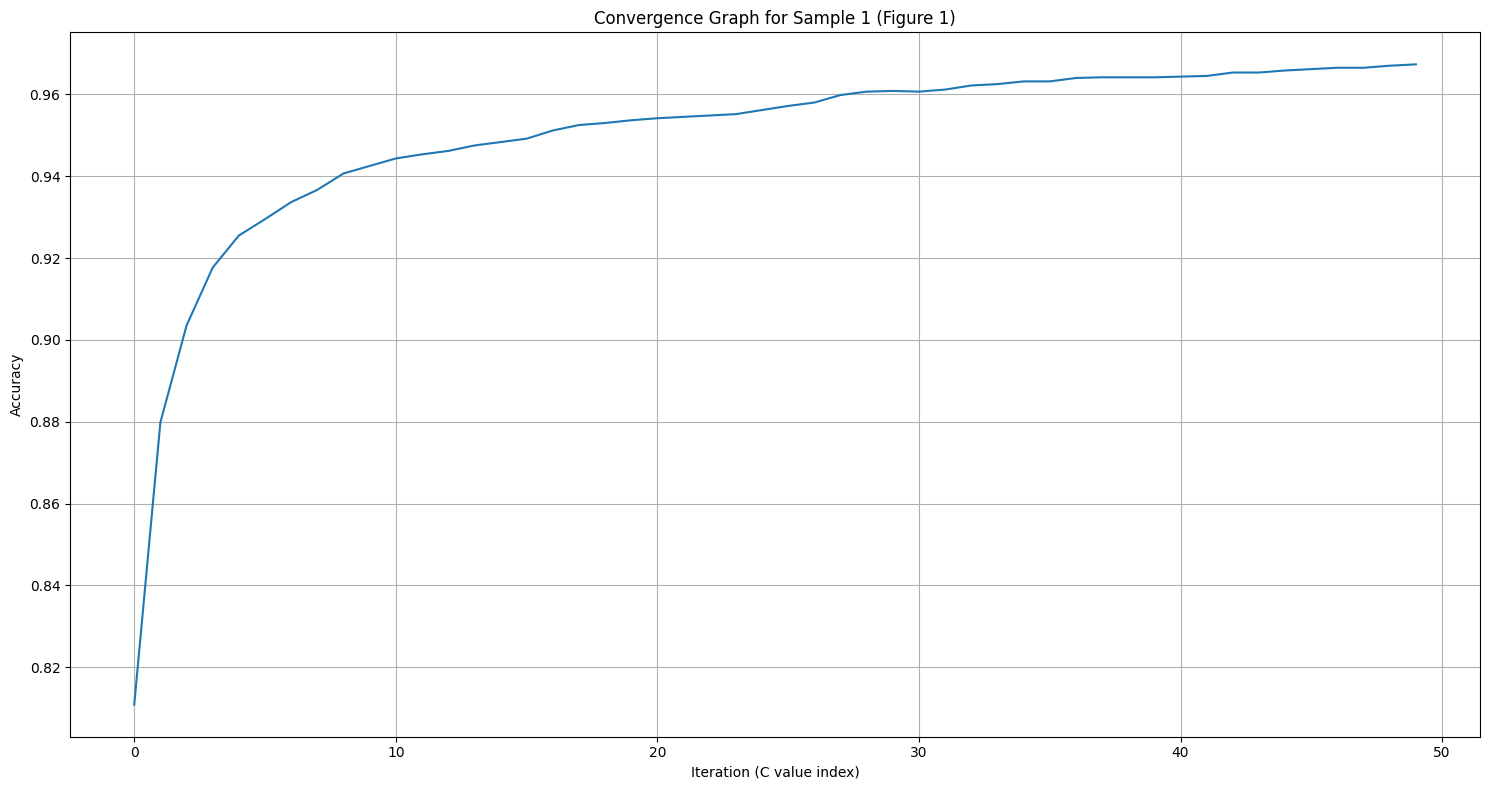

In [7]:
best_sample_idx = results_df['Best Accuracy'].idxmax()
plt.figure(figsize=(15, 8))
plt.plot(convergence_data[best_sample_idx])
plt.title(f'Convergence Graph for Sample {best_sample_idx + 1} (Figure 1)')
plt.xlabel('Iteration (C value index)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()